http://download.gna.org/getfem/html/homepage/python/examples.html

In [1]:
# import basic modules
import getfem as gf
import numpy as np

# creation of a simple cartesian mesh
m = gf.Mesh('cartesian', np.arange(0,1.1,0.1), np.arange(0,1.1,0.1))

In [2]:
# create a MeshFem of for a field of dimension 1 (i.e. a scalar field)
mf = gf.MeshFem(m, 1)
# assign the Q2 fem to all convexes of the MeshFem
mf.set_fem(gf.Fem('FEM_QK(2,2)'))

In [3]:
# view the expression of its basis functions on the reference convex
print gf.Fem('FEM_QK(2,2)').poly_str()

('1 - 3*x - 3*y + 2*x^2 + 9*x*y + 2*y^2 - 6*x^2*y - 6*x*y^2 + 4*x^2*y^2', '4*x - 4*x^2 - 12*x*y + 12*x^2*y + 8*x*y^2 - 8*x^2*y^2', '-x + 2*x^2 + 3*x*y - 6*x^2*y - 2*x*y^2 + 4*x^2*y^2', '4*y - 12*x*y - 4*y^2 + 8*x^2*y + 12*x*y^2 - 8*x^2*y^2', '16*x*y - 16*x^2*y - 16*x*y^2 + 16*x^2*y^2', '-4*x*y + 8*x^2*y + 4*x*y^2 - 8*x^2*y^2', '-y + 3*x*y + 2*y^2 - 2*x^2*y - 6*x*y^2 + 4*x^2*y^2', '-4*x*y + 4*x^2*y + 8*x*y^2 - 8*x^2*y^2', 'x*y - 2*x^2*y - 2*x*y^2 + 4*x^2*y^2')


In [4]:
# an exact integration will be used
mim = gf.MeshIm(m, gf.Integ('IM_EXACT_PARALLELEPIPED(2)'))

In [5]:
# detect the border of the mesh
border = m.outer_faces()
# mark it as boundary #42
m.set_region(42, border)

In [6]:
# empty real model
md = gf.Model('real')

In [7]:
# declare that "u" is an unknown of the system
# on the finite element method `mf`
md.add_fem_variable('u', mf)

In [8]:
# add generic elliptic brick on "u"
md.add_Laplacian_brick(mim, 'u');

In [9]:
# add Dirichlet condition
g = mf.eval('x*(x-1) - y*(y-1)')
md.add_initialized_fem_data('DirichletData', mf, g)
md.add_Dirichlet_condition_with_multipliers(mim, 'u', mf, 42, 'DirichletData')

1

In [10]:
# solve the linear system
md.solve()

(0, 1)

In [11]:
# extracted solution
u = md.variable('u')

In [12]:
# export computed solution
mf.export_to_pos('u.pos',u,'Computed solution')

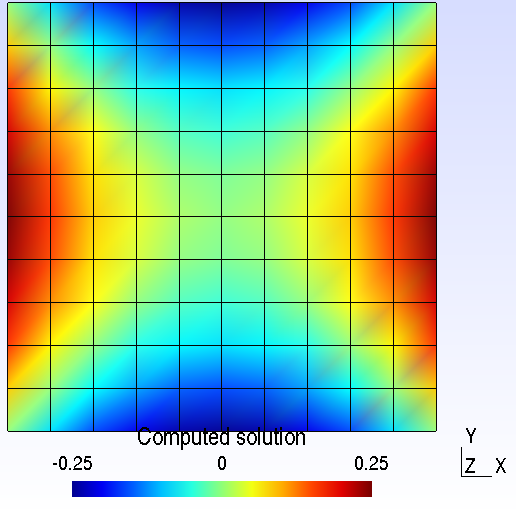

In [18]:
from IPython.display import Image
Image(filename='image.png', width=300)